<a href="https://colab.research.google.com/github/Ankur099IIT/Introduction-to-Tensorflow-for-AI-ML-and-DS_coursera_Ankur-codes/blob/main/Cat_vs_dog_dataset_Using_more_sophisticated_images_with_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-04-25 04:17:12--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.103.128, 108.177.120.128, 142.251.6.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.103.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   213MB/s    in 0.3s    

2022-04-25 04:17:13 (213 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [17]:
import zipfile

zip_ref = zipfile.ZipFile('/content/cats_and_dogs_filtered.zip', 'r')

zip_ref.extractall('/content/cats_and_dogs_filtered')

zip_ref.close()

In [18]:
import os


base_dir = os.path.join('/content/cats_and_dogs_filtered/cats_and_dogs_filtered')

print('Content of base directory:')
print(os.listdir('/content/cats_and_dogs_filtered/cats_and_dogs_filtered'))
print('\n Content of train directory:', os.listdir('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/train'))
print('\n content of the validation directory:', os.listdir('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/validation'))


Content of base directory:
['validation', 'vectorize.py', 'train']

 Content of train directory: ['dogs', 'cats']

 content of the validation directory: ['dogs', 'cats']


In [19]:
train_dir = os.path.join('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/train')
validation_dir = os.path.join('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/validation')

In [20]:
train_cat_dir = os.path.join('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats')
train_dog_dir = os.path.join('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs')

validation_cat_dir = os.path.join('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/validation/cats')
validation_dog_dir = os.path.join('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/validation/dogs')

In [21]:
train_cat_names = os.listdir(train_cat_dir)
train_dog_names = os.listdir(train_dog_dir)

validation_cat_names = os.listdir(validation_cat_dir)
validation_dog_names = os.listdir(validation_dog_dir)

In [22]:
len(train_cat_names), len(validation_cat_names)

(1000, 500)

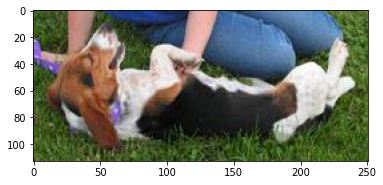

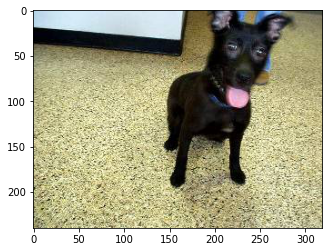

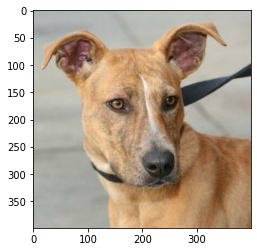

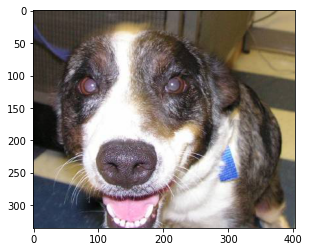

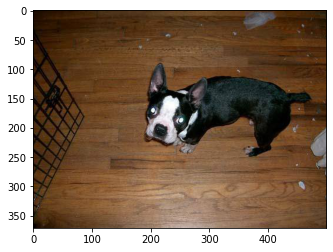

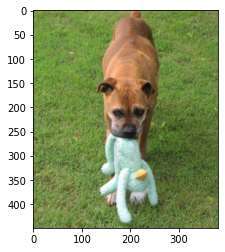

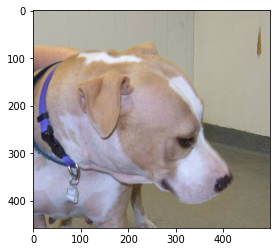

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
for i in range(0,7):
  file_path = os.path.join(train_dog_dir, train_dog_names[i])
  img = mpimg.imread(file_path)
  plt.imshow(img)

  plt.show()

In [24]:
# Data preprocessing

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.0)
validation_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory(
    '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/train',
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/validation',
    target_size = (150,150),
    batch_size = 20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [25]:
import tensorflow as tf
import numpy as np

model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units = 512, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [26]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss  = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate = 0.001),
              metrics = ['accuracy'])

In [41]:
history  = model.fit(train_generator, 
          steps_per_epoch = 100,
          validation_data = validation_generator,
          validation_steps = 50,
          epochs = 15)

Epoch 1/15
100/100 [==============================] - 11s 109ms/step - loss: 0.0670 - accuracy: 0.9870 - val_loss: 2.3807 - val_accuracy: 0.6740
Epoch 2/15
100/100 [==============================] - 11s 107ms/step - loss: 0.0566 - accuracy: 0.9855 - val_loss: 2.0099 - val_accuracy: 0.7020
Epoch 3/15
100/100 [==============================] - 11s 107ms/step - loss: 0.0267 - accuracy: 0.9925 - val_loss: 2.1681 - val_accuracy: 0.6990
Epoch 4/15
100/100 [==============================] - 11s 107ms/step - loss: 0.0598 - accuracy: 0.9915 - val_loss: 2.2787 - val_accuracy: 0.7020
Epoch 5/15
100/100 [==============================] - 11s 107ms/step - loss: 0.0543 - accuracy: 0.9875 - val_loss: 2.1911 - val_accuracy: 0.7090
Epoch 6/15
100/100 [==============================] - 11s 108ms/step - loss: 0.0296 - accuracy: 0.9920 - val_loss: 2.0287 - val_accuracy: 0.7320
Epoch 7/15
100/100 [==============================] - 11s 106ms/step - loss: 0.0304 - accuracy: 0.9920 - val_loss: 2.4110 - val_ac

In [42]:
# # testing random images in our trained model...(CODE BLOCK FOR SAFARI USERS)

import numpy as np
from keras.preprocessing import image
import os

images = os.listdir("/tmp/images")

print(images)

for i in images:
  print()
  #  # predicting images
  path = '/tmp/images/' + i
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img) # convert image to numerical array
  x /= 255
  x = np.expand_dims(x, axis=0) # add one dimension to x

  images = np.vstack([x]) # stack the two arrays (one row over the other)
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(i + " is a dog")
  else:
    print(i + " is a cat")

['32665E6F-8D90-4567-9769D59E11DB7F26_source.jpg.webp']

[0.84512657]
32665E6F-8D90-4567-9769D59E11DB7F26_source.jpg.webp is a dog


In [43]:
type(images)

numpy.ndarray

In [44]:
path

'/tmp/images/32665E6F-8D90-4567-9769D59E11DB7F26_source.jpg.webp'

In [45]:
x, type(x)

(array([[[[0.9137255 , 0.92941177, 0.9411765 ],
          [0.9137255 , 0.92941177, 0.9411765 ],
          [0.9137255 , 0.92941177, 0.9411765 ],
          ...,
          [0.90588236, 0.92156863, 0.93333334],
          [0.90588236, 0.92156863, 0.93333334],
          [0.9098039 , 0.9254902 , 0.9372549 ]],
 
         [[0.9137255 , 0.92941177, 0.9411765 ],
          [0.9137255 , 0.92941177, 0.9411765 ],
          [0.9137255 , 0.92941177, 0.9411765 ],
          ...,
          [0.90588236, 0.92156863, 0.93333334],
          [0.90588236, 0.92156863, 0.93333334],
          [0.9098039 , 0.9254902 , 0.9372549 ]],
 
         [[0.9137255 , 0.92941177, 0.9411765 ],
          [0.9137255 , 0.92941177, 0.9411765 ],
          [0.9137255 , 0.92941177, 0.9411765 ],
          ...,
          [0.90588236, 0.92156863, 0.93333334],
          [0.90588236, 0.92156863, 0.93333334],
          [0.9098039 , 0.9254902 , 0.9372549 ]],
 
         ...,
 
         [[0.9607843 , 0.99607843, 0.99607843],
          [0.96078

In [46]:
x.ndim

4

In [47]:
images

array([[[[0.9137255 , 0.92941177, 0.9411765 ],
         [0.9137255 , 0.92941177, 0.9411765 ],
         [0.9137255 , 0.92941177, 0.9411765 ],
         ...,
         [0.90588236, 0.92156863, 0.93333334],
         [0.90588236, 0.92156863, 0.93333334],
         [0.9098039 , 0.9254902 , 0.9372549 ]],

        [[0.9137255 , 0.92941177, 0.9411765 ],
         [0.9137255 , 0.92941177, 0.9411765 ],
         [0.9137255 , 0.92941177, 0.9411765 ],
         ...,
         [0.90588236, 0.92156863, 0.93333334],
         [0.90588236, 0.92156863, 0.93333334],
         [0.9098039 , 0.9254902 , 0.9372549 ]],

        [[0.9137255 , 0.92941177, 0.9411765 ],
         [0.9137255 , 0.92941177, 0.9411765 ],
         [0.9137255 , 0.92941177, 0.9411765 ],
         ...,
         [0.90588236, 0.92156863, 0.93333334],
         [0.90588236, 0.92156863, 0.93333334],
         [0.9098039 , 0.9254902 , 0.9372549 ]],

        ...,

        [[0.9607843 , 0.99607843, 0.99607843],
         [0.9607843 , 0.99607843, 0.99607843]

<Figure size 432x288 with 0 Axes>

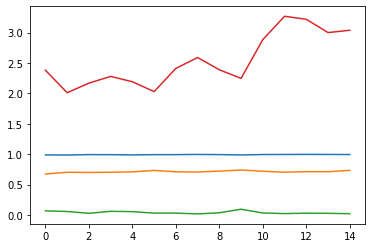

<Figure size 432x288 with 0 Axes>

In [52]:
# Evaluating accuracy and loss of the model

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.figure()
